# Analyze SoHappy output files
This scripts analyse the fits file produced with SoHappy


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack

In [40]:
import sys
sys.path.append("../../../utilities_ths/")  # path is where this module is
from utilities_ths import MyLabel
def hist1d(var,axis,bins,title="",legend="",xlabel="",ylabel="",alpha=1,stat=True,histtype="bar",label=""):
    plt.hist(var,bins=nbin,alpha=alpha,histtype=histtype,label=MyLabel(var,label))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.title(title)
    plt.legend()
    return

In [41]:
def ConvertAsciiToFits(txtfile_noext):
    data = Table.read(txtfile_noext+".txt",format="ascii")
    data.write(txtfile_noext+'_converted.fits', format="fits",overwrite="True")
    print(" <<<<<<<< Converted >>>>>>>>")

In [42]:
def GetData(file,debug=False):
    data = Table.read(file,format="fits")
    if (debug): print(data)
    return data

### Bricolage

In [43]:
# file = "Result-PseudoPopulation-20deg/PopulationSummary.txt"
# ConvertAsciiToFits(file[:-4])

### Analyze data

In [44]:
#source = "Longo"
source = "Stolar"
plot20 = True
plot40 = True
plot60 = True
if (source == "Longo"):
    # Concatenate files if required
    data20 = GetData("ResultFrancescoLongo/GRBz20.fits")
    data40 = GetData("ResultFrancescoLongo/GRBz40.fits")
    data = vstack([data20, data40])
    del data20
    del data40
else:
    # Concatenate files if required
    data20 = GetData("../Result/ResultArchiveOfficiel/Result-PseudoPopulation-20deg/PopulationSummary_Reco1_100s_100iter.fits")
    data40 = GetData("../Result/ResultArchiveOfficiel/Result-PseudoPopulation-40deg/PopulationSummary_Reco1_100s_100iter.fits")
    data60 = GetData("../Result/ResultArchiveOfficiel/Result-PseudoPopulation-60deg/PopulationSummary_Reco1_100s_100iter.fits")
    print(len(data20),len(data40),len(data60))
    data = vstack([data20, data40, data60])
    del data20
    del data40
    del data60

80 80 80


In [45]:
# Initialize data
name    = data["GRB"]
z       = data["z"]
theta   = data["Zenith"]
sigmax  = data["sigmax"]
nex_max = data["nex_max"]
nb_max  = data["nb_max"]
#t3s     = data["t3s"][data["t3s"]>0] # This changes the dimension of t3s !
t3s     = data["t3s"]
idt3s   = np.where(t3s>0) # If defined
det3s   = data["det3s"]
t5s     = data["t5s"]
idt5s   = np.where(t5s>0) 
det5s   = data["det5s"]  
#print(np.mean(t3s))

In [8]:
len(np.where(t3s>0)[0])

235

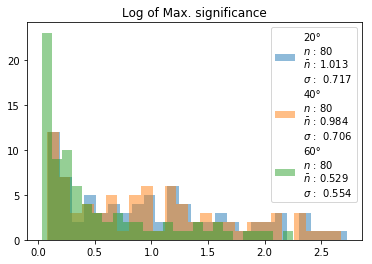

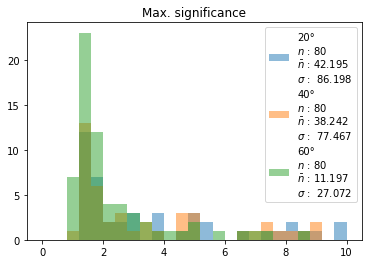

In [23]:
if (plot20): plt.hist(np.log10(sigmax[theta==20]),bins=25,alpha=0.5,label=MyLabel(np.log10(sigmax[theta==20]),"20°"))
if (plot40): plt.hist(np.log10(sigmax[theta==40]),alpha=0.5,bins=25,label=MyLabel(np.log10(sigmax[theta==40]),"40°"))
if (plot60): plt.hist(np.log10(sigmax[theta==60]),alpha=0.5,bins=25,label=MyLabel(np.log10(sigmax[theta==60]),"60°"))
plt.title("Log of Max. significance")
plt.legend()
plt.show()
if (plot20): 
    n,bins,_ = plt.hist(sigmax[theta==20],bins=25,range=[0,10],alpha=0.5,label=MyLabel(sigmax[theta==20],"20°"))
if (plot40): 
    plt.hist(sigmax[theta==40],bins,alpha=0.5,label=MyLabel(sigmax[theta==40],label="40°"))
if (plot60): 
    plt.hist(sigmax[theta==60],bins,alpha=0.5,label=MyLabel(sigmax[theta==60],label="60°"))
plt.title("Max. significance")
plt.legend()
plt.show()

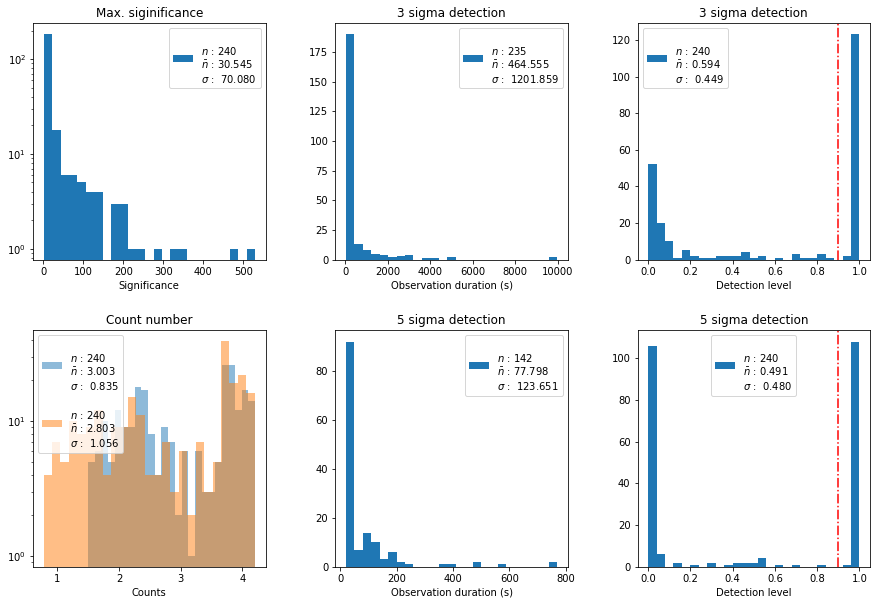

In [37]:
# Indifferantiated lot
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

nbin=25
ax = plt.subplot(231)
ax.semilogy()
hist1d(sigmax,  axis=ax,bins=nbin,xlabel="Significance",ylabel="",title="Max. siginificance")

ax = plt.subplot(232)
hist1d(t3s[idt3s],  axis=ax,bins=nbin,xlabel="Observation duration (s)",ylabel="",title="3 sigma detection")

ax = plt.subplot(233)
hist1d(det3s,axis=ax,bins=nbin,xlabel="Detection level",ylabel="",title="3 sigma detection")
plt.axvline(x=0.9,color="red",linestyle="-.")

ax = plt.subplot(234)
ax.semilogy()
hist1d(np.log10(nex_max+nb_max),axis=ax,bins=10*nbin,xlabel="Log10(Counts)",legend="Total\n",ylabel="",title="Count number",alpha=0.5,stat=False)
hist1d(np.log10(nb_max),axis=ax,bins=10*nbin,xlabel="Counts",legend="Bckgd\n",ylabel="",title="Count number",alpha=0.5,stat=False)
ax = plt.subplot(235)
hist1d(t5s[idt5s],  axis=ax,bins=nbin,xlabel="Observation duration (s)",ylabel="",title="5 sigma detection")

ax = plt.subplot(236)
hist1d(det5s,axis=ax,bins=nbin,xlabel="Detection level",ylabel="",title="5 sigma detection")
plt.axvline(x=0.9,color="red",linestyle="-.")


plt.show()

In [ ]:
# Differentiated zenith
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

nbin=25
ax = plt.subplot(231)
ax.semilogy()
n, bins, p = hist1d(sigmax,bins=nbin,axis=ax,xlabel="Significance",ylabel="",legend="* All",title="Max. siginificance",histtype="step")

if (plot40): 
    hist1d(sigmax[theta==40],bins,  axis=ax,xlabel="Significance",
       ylabel="",legend="* 40°",alpha=0.5,title="Max. siginificance")
if (plot60): 
    hist1d(sigmax[theta==60],  bins,axis=ax, xlabel="Significance",
       ylabel="",legend="* 60°",alpha=0.5,title="Max. siginificance")
plt.grid()

# ax = plt.subplot(232)
# ax.semilogy()
# hist1d(t3s[idt3s],                    
#        axis=ax,bins=nbin,xlabel="Observation duration (s)",
#        ylabel="",legend="* All",title="3 sigma detection",histtype="step")
# if (plot40): 
#     hist1d(t3s[idt3s][theta[idt3s]==40],  
#        axis=ax,bins=nbin,xlabel="Observation duration (s)",
#        ylabel="",legend="* 40°",alpha=0.5,title="3 sigma detection")
# if (plot60): 
#     hist1d(t3s[idt3s][theta[idt3s]==60],  
#        axis=ax,bins=nbin,xlabel="Observation duration (s)",
#        ylabel="",legend="* 60°",alpha=0.5,title="3 sigma detection")
# plt.grid()

# ax = plt.subplot(233)
# hist1d(det3s,axis=ax,bins=nbin,xlabel="Detection level",
#        ylabel="",legend="* All",title="3 sigma detection",histtype="step",stat=False)
# if (plot40): 
#     hist1d(det3s[theta==40],axis=ax,bins=nbin,xlabel="Detection level",
#        ylabel="",legend="* 40°",alpha=0.5,title="3 sigma detection",stat=False)
# if (plot60): 
#     hist1d(det3s[theta==60],axis=ax,bins=nbin,xlabel="Detection level",
#        ylabel="",legend="* 60°",alpha=0.5,title="3 sigma detection",stat=False)
# plt.grid()
# plt.axvline(x=0.9,color="red",linestyle="-.")

# ax = plt.subplot(234)
# ax.semilogy()

# nbin=10
# hist1d(nex_max,axis=ax,bins=nbin,xlabel="Counts",legend="* All",
#        ylabel="",title="Excess count number",alpha=0.5,stat=True,histtype="step")
# if (plot20): 
#     hist1d(nex_max[theta==20],axis=ax,bins=nbin,xlabel="Counts",legend="* 20°",
#        ylabel="",title="Excess count number",alpha=0.5,stat=True,histtype="step")
# if (plot40): 
#     hist1d(nex_max[theta==40],axis=ax,bins=nbin,xlabel="Counts",legend="* 40°",
#        ylabel="",title="Excess count number",alpha=0.5,stat=True)
# if (plot60): 
#     hist1d(nex_max[theta==60],axis=ax,bins=nbin,xlabel="Counts",legend="* 60°",
#        ylabel="",title="Excess count number",alpha=0.5,stat=True)

# nbin=25
# ax = plt.subplot(235)
# ax.semilogy()
# hist1d(t5s[idt5s],                    
#        axis=ax,bins=nbin,xlabel="Observation duration (s)",
#        ylabel="",legend="* All",title="5 sigma detection",histtype="step")
# if (plot40): 
#     hist1d(t5s[idt5s][theta[idt5s]==40],  
#        axis=ax,bins=nbin,xlabel="Observation duration (s)",
#        ylabel="",legend="* 40°",alpha=0.5,title="5 sigma detection")
# if (plot60): 
#     hist1d(t5s[idt5s][theta[idt5s]==60],  
#        axis=ax,bins=nbin,xlabel="Observation duration (s)",
#        ylabel="",legend="* 60°",alpha=0.5,title="5 sigma detection")
# plt.grid()

# ax = plt.subplot(236)
# hist1d(det5s,axis=ax,bins=nbin,xlabel="Detection level",
#        ylabel="",legend="* All",title="5 sigma detection",histtype="step",stat=False)
# if (plot40): 
#     hist1d(det5s[theta==40],axis=ax,bins=nbin,xlabel="Detection level",
#        ylabel="",legend="* 40°",alpha=0.5,title="5 sigma detection",stat=False)
# if (plot60): 
#     hist1d(det5s[theta==60],axis=ax,bins=nbin,xlabel="Detection level",
#        ylabel="",legend="* 60°",alpha=0.5,title="5 sigma detection",stat=False)
# plt.grid()
# plt.axvline(x=0.9,color="red",linestyle="-.")


plt.show()

In [ ]:
#
n, bins, p = hist1d(sigmax,bins=nbin,axis=ax,xlabel="Significance",ylabel="",legend="* All",title="Max. siginificance",histtype="step")


In [ ]:
import numpy as np
np.log10(5)